In [68]:
# Load used libraries
library(dplyr)
library(tidyverse)
library(RColorBrewer)
library(patchwork)
library(car)
library(ggpubr)
library(rstatix)
library(xtable)
library(comprehenr)
setwd('d:\\microbial_network\\microbial_network_explore')

In [110]:
# Read data
result <- read.csv("data\\temp_results\\simulation_results_fixed_interaction.csv")

In [111]:
result_absolute <- result %>%
  filter(abs_rel == 'Absolute') %>%
  {.}
result_relative <- result %>%
  filter(abs_rel == 'Relative') %>%
  {.}
head(result_absolute)

,Method,run,average_precision_score,roc_auc_score,abs_rel
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Pearson,0,0.9111111,0.8400000,Absolute
2,Spearman,0,0.6444444,0.7200000,Absolute
3,cLV,0,0.3649591,0.4505495,Absolute
4,gLV,0,0.9246503,0.9100000,Absolute
5,Partial Pearson,0,0.6024478,0.4800000,Absolute
6,Partial Spearman,0,0.6517308,0.7350000,Absolute


In [106]:
methods = unique(result$Method)
my_comparisons = to_list(for (method in methods) if (method != 'Baseline') c(method, 'Baseline'))

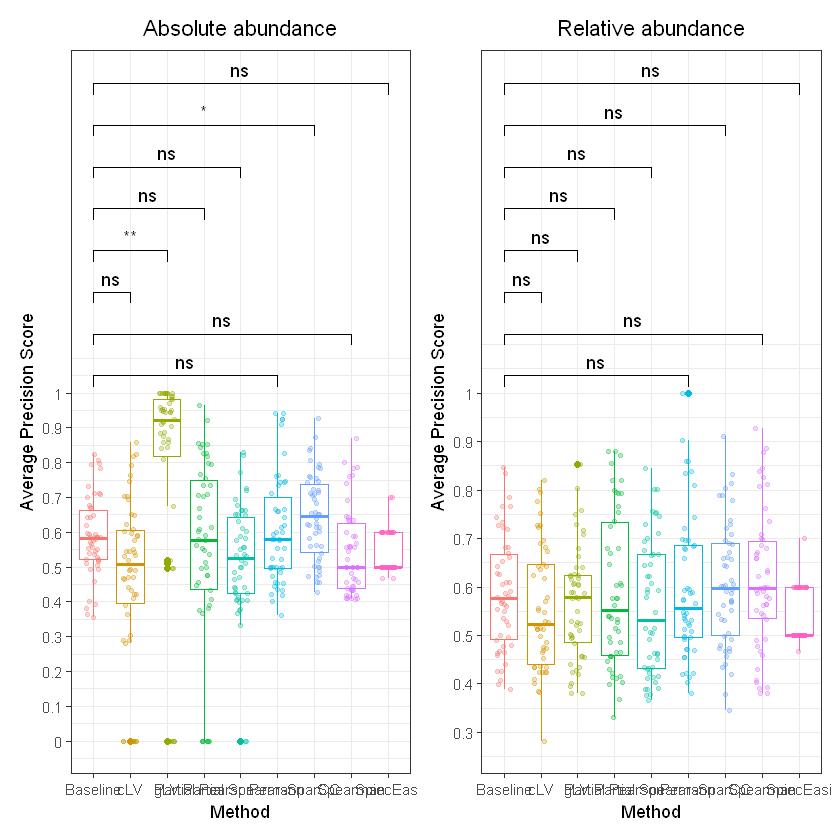

In [122]:
blind_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000")
abs_pr_box <- ggplot(data = result_absolute, aes(x = Method, y=average_precision_score, color = Method, )) +
  geom_boxplot() +
#   geom_bar()+
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "Average Precision Score") +
  ggtitle("Absolute abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 'wilcox.test', paired = TRUE, method.args = list(alternative = 'greater')) +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_absolute_abundance.pdf",
 width = 20, height = 20, units = "cm")

rel_pr_box <- ggplot(data = result_relative, aes(x = Method, y=average_precision_score, color = Method, )) +
  geom_boxplot() +
#   geom_bar()+
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "Average Precision Score") +
  ggtitle("Relative abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 'wilcox.test', paired = TRUE, method.args = list(alternative = 'greater')) +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_relative_abundance.pdf",
 width = 20, height = 20, units = "cm")

pr_box <- abs_pr_box + rel_pr_box
pr_box
ggsave(filename = "figures\\pr_combined_fixed_interaction.pdf",
 width = 40, height = 20, units = "cm")

Warning message in wilcox.test.default(c(0.84, 0.24, 0.32, 0.32, 0.36, 0.32, 0.4, :
"无法精確計算带连结的p值"
Warning message in wilcox.test.default(c(0.84, 0.24, 0.32, 0.32, 0.36, 0.32, 0.4, :
"有0时无法計算精確的p值"
Warning message in wilcox.test.default(c(0.32, 0.56, 0.56, 0.56, 0.64, 0.76, 0.36, :
"无法精確計算带连结的p值"
Warning message in wilcox.test.default(c(0.32, 0.56, 0.56, 0.56, 0.64, 0.76, 0.36, :
"有0时无法計算精確的p值"
Warning message in wilcox.test.default(c(0.72, 0.48, 0.04, 0.38, 0.52, 0.4, 0.5, :
"无法精確計算带连结的p值"
Warning message in wilcox.test.default(c(0.72, 0.48, 0.04, 0.38, 0.52, 0.4, 0.5, :
"有0时无法計算精確的p值"
Warning message in wilcox.test.default(c(0.54, 0.34, 0.33, 0.6, 0.45, 0.61, 0.53, :
"无法精確計算带连结的p值"
Warning message in wilcox.test.default(c(0.54, 0.34, 0.33, 0.6, 0.45, 0.61, 0.53, :
"有0时无法計算精確的p值"
Warning message in wilcox.test.default(c(0.48, 0.32, 0.52, 0.4, 0.36, 0.4, 0.4, :
"无法精確計算带连结的p值"
Warning message in wilcox.test.default(c(0.48, 0.32, 0.52, 0.4, 0.36, 0.4, 0.4, :
"有0时无法計算精確的p值"
Warning messag

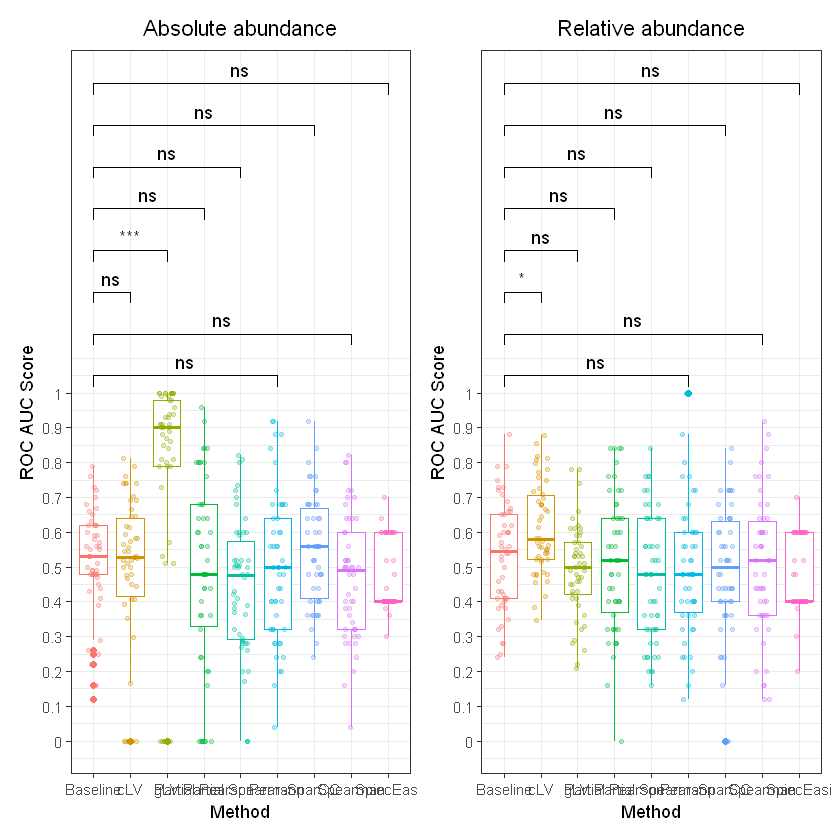

In [123]:
blind_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000")
abs_pr_box <- ggplot(data = result_absolute, aes(x = Method, y=roc_auc_score, color = Method, )) +
  geom_boxplot() +
#   geom_bar()+
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "ROC AUC Score") +
  ggtitle("Absolute abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 'wilcox.test', paired = TRUE, method.args = list(alternative = 'greater')) +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_absolute_abundance.pdf",
 width = 20, height = 20, units = "cm")

rel_pr_box <- ggplot(data = result_relative, aes(x = Method, y=roc_auc_score, color = Method, )) +
  geom_boxplot() +
#   geom_bar()+
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "ROC AUC Score") +
  ggtitle("Relative abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 'wilcox.test', paired = TRUE, method.args = list(alternative = 'greater')) +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_relative_abundance.pdf",
 width = 20, height = 20, units = "cm")

pr_box <- abs_pr_box + rel_pr_box
pr_box
ggsave(filename = "figures\\auroc_combined_fixed_interaction.pdf",
 width = 40, height = 20, units = "cm")

In [115]:
# Read data
result <- read.csv("data\\temp_results\\vary_timepoints.csv")
head(result)

,Method,run,average_precision_score,roc_auc_score,time_points
,<chr>,<int>,<dbl>,<dbl>,<int>
1,Pearson,0,0.6676190,0.5600000,100
2,Spearman,0,0.5000000,0.5000000,100
3,cLV,0,0.4994103,0.4945055,100
4,gLV,0,0.8700957,0.7700000,100
5,Baseline,0,0.4784965,0.4100000,100
6,Pearson,1,0.6638889,0.4000000,100


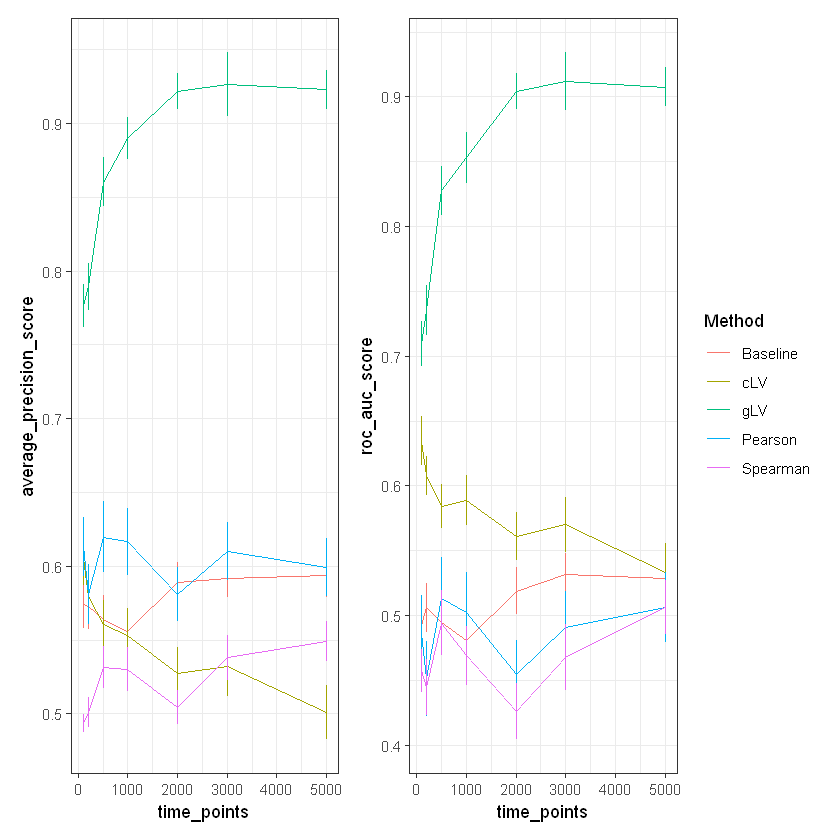

In [119]:
pr_line <- ggplot(data = result, aes(x = time_points, y=average_precision_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
    theme_bw()
auroc_line <- ggplot(data = result, aes(x = time_points, y=roc_auc_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
    theme_bw()
line_timepoint <- pr_line + auroc_line + plot_layout(guides='collect')
line_timepoint
ggsave(filename = "figures\\line_timepoint.pdf",
 width = 40, height = 20, units = "cm")

In [137]:
# Read data
result <- read.csv("data\\temp_results\\vary_time_interval.csv")
head(result)
min(result$average_precision_score)

,Method,run,average_precision_score,roc_auc_score,time_interval
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Pearson,0,0.6676190,0.5600000,1e-04
2,Spearman,0,0.5000000,0.5000000,1e-04
3,cLV,0,0.5197246,0.5104167,1e-04
4,gLV,0,0.7075810,0.6500000,1e-04
5,Baseline,0,0.5987840,0.5500000,1e-04
6,Pearson,0,0.6968254,0.5200000,1e-03


[1] 0

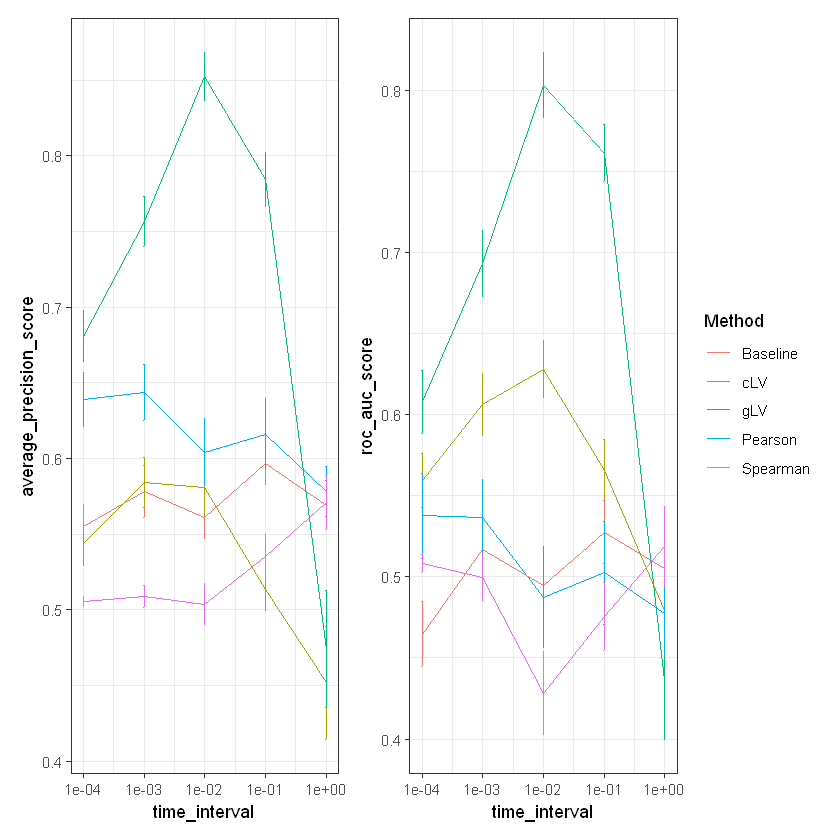

In [138]:
pr_line <- ggplot(data = result, aes(x = time_interval, y=average_precision_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
    scale_x_continuous(trans='log10') +
    theme_bw()
auroc_line <- ggplot(data = result, aes(x = time_interval, y=roc_auc_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
    scale_x_continuous(trans='log10') +
    theme_bw()
line_time_interval <- pr_line + auroc_line + plot_layout(guides='collect')
line_time_interval
ggsave(filename = "figures\\line_time_interval.pdf",
 width = 40, height = 20, units = "cm")

In [139]:
# Read data
result <- read.csv("data\\temp_results\\vary_num_taxa.csv")
head(result)

,Method,run,average_precision_score,roc_auc_score,num_taxa
,<chr>,<int>,<dbl>,<dbl>,<int>
1,Pearson,0,0.5333333,0.4000000,5
2,Spearman,0,0.5000000,0.5000000,5
3,cLV,0,0.4129496,0.4270833,5
4,gLV,0,0.6569189,0.6000000,5
5,Baseline,0,0.4017907,0.2800000,5
6,Pearson,0,0.1885721,0.3842857,10


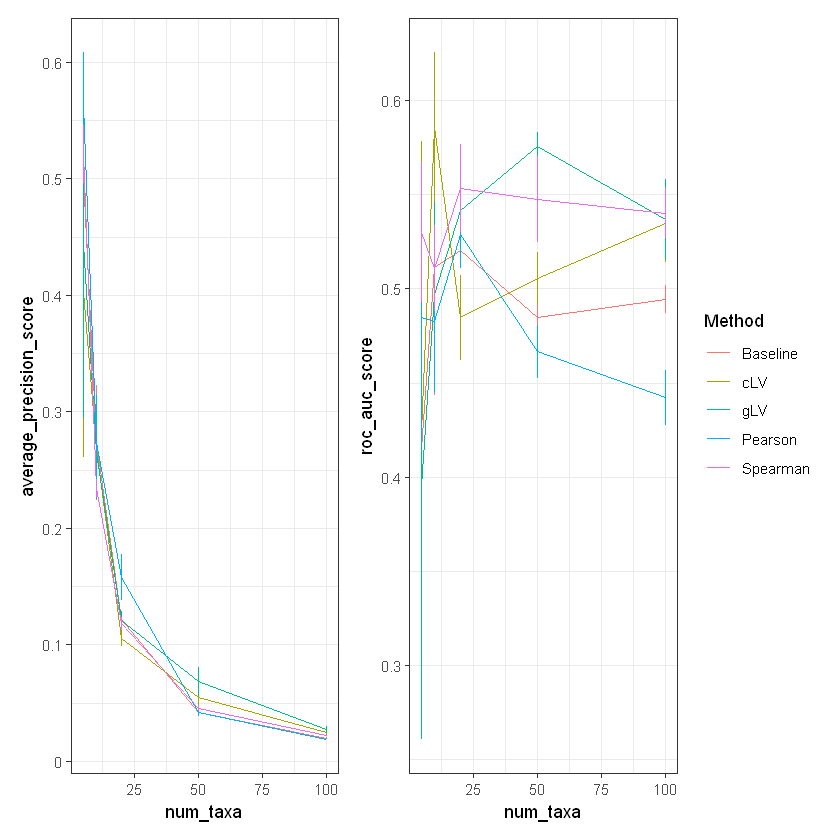

In [140]:
pr_line <- ggplot(data = result, aes(x = num_taxa, y=average_precision_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
#     scale_x_continuous(trans='log10') +
    theme_bw()
auroc_line <- ggplot(data = result, aes(x = num_taxa, y=roc_auc_score, color = Method, )) +
    stat_summary(aes(color = Method), fun.y = mean, geom = "line") +
    stat_summary(aes(color = Method), fun.data = mean_se, geom = "errorbar", width = 0.01) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
#     scale_x_continuous(trans='log10') +
    theme_bw()
line_time_interval <- pr_line + auroc_line + plot_layout(guides='collect')
line_time_interval

In [154]:
# Read data
result <- read.csv("data\\temp_results\\vary_network_type.csv")
result <- result %>% filter(Method=='gLV')
head(result)

,Method,run,average_precision_score,roc_auc_score,network_type
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,gLV,0,0.0000000,0.0000000,random
2,gLV,0,0.2537606,0.6131200,small-world
3,gLV,0,0.3141070,0.6406982,scale-free
4,gLV,1,0.2331657,0.6022509,random
5,gLV,1,0.2081881,0.6064689,small-world
6,gLV,1,0.2291801,0.5814182,scale-free


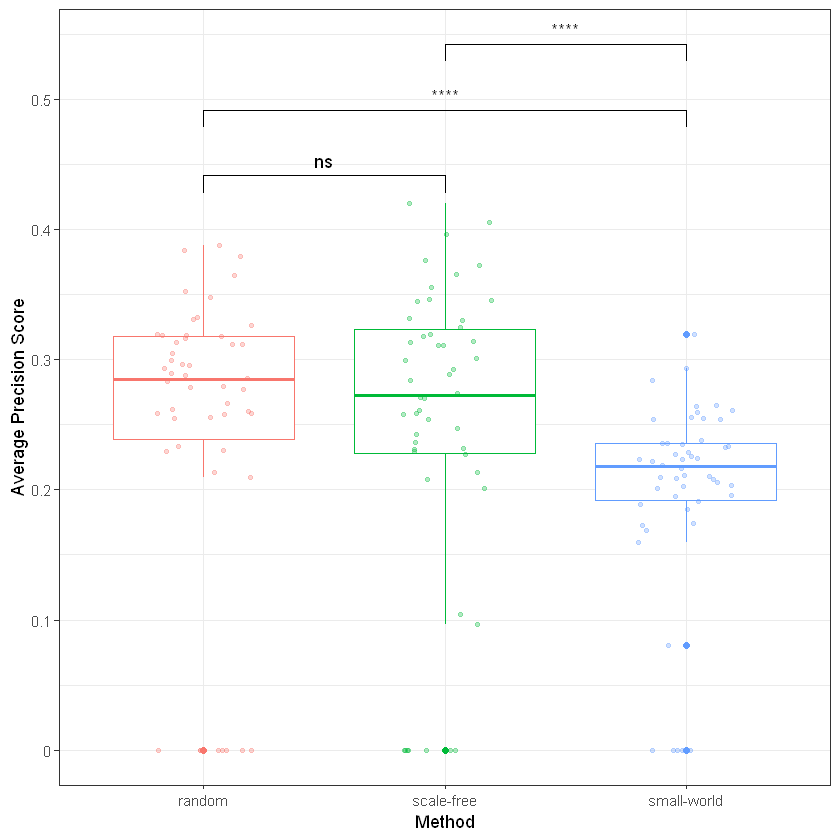

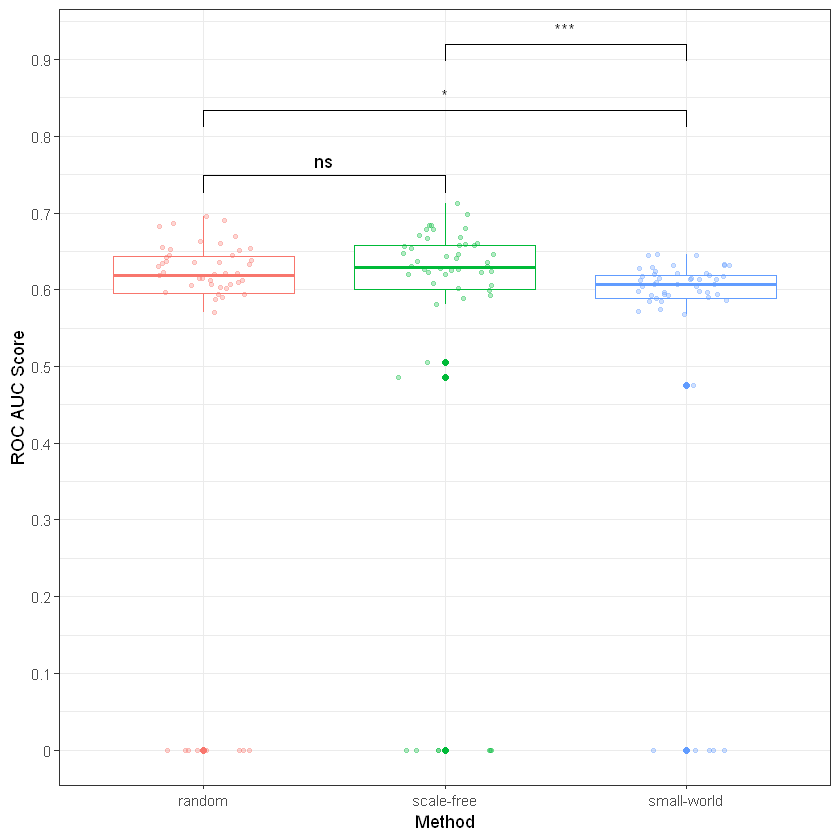

In [155]:
my_comparisons = list(c('random', 'scale-free'), c('random', 'small-world'), c('scale-free', 'small-world'))
blind_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000")
pr_box <- ggplot(data = result, aes(x = network_type, y=average_precision_score, color = network_type, )) +
  geom_boxplot() +
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "Average Precision Score") +
#   ggtitle("Absolute abundance") +
  stat_compare_means(comparisons=my_comparisons, label = "p.signif", method = 'wilcox.test') +
  theme(plot.title = element_text(hjust = 0.5))
auroc_box <- ggplot(data = result, aes(x = network_type, y=roc_auc_score, color = network_type, )) +
  geom_boxplot() +
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), labels = seq(0,1,0.1)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "ROC AUC Score") +
#   ggtitle("Absolute abundance") +
  stat_compare_means(comparisons=my_comparisons, label = "p.signif", method = 'wilcox.test') +
  theme(plot.title = element_text(hjust = 0.5))
network_type_box <- pr_box + auroc_box
pr_box
auroc_box
# ggsave(filename = "figures\\box_network_type.pdf",
#  width = 40, height = 20, units = "cm")